In [ ]:
!pip install tensorflow-gpu==2.3.0

     |████████████████████████████████| 320.4MB 48kB/s 
     |████████████████████████████████| 460kB 43.0MB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
from google.colab import files
files.upload()

Saving model (2).hdf5 to model (2).hdf5


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('train.csv.zip', 'r')
zip_ref.extractall('./')

zip_ref = zipfile.ZipFile('test.csv.zip', 'r')
zip_ref.extractall('./')

zip_ref = zipfile.ZipFile('icml_face_data.csv.zip', 'r')
zip_ref.extractall('./')

In [ ]:

from keras.models import Model
import keras
import csv
from PIL import Image    
from sklearn.model_selection import train_test_split
from keras.layers import Input, Add, Dense, Activation,BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import numpy as np # linear algebra
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import collections
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout

In [ ]:
data_set = pd.read_csv('train.csv')
examples = pd.read_csv('test.csv')

In [ ]:
ax = np.array(data_set.emotion)
collections.Counter(ax)

Counter({0: 3995, 1: 436, 2: 4097, 3: 7215, 4: 4830, 5: 3171, 6: 4965})

In [ ]:
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample((data_set.pixels).values.reshape(-1, 1), data_set.emotion)


a = np.array(y_over)
collections.Counter(a)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 7215, 1: 7215, 2: 7215, 3: 7215, 4: 7215, 5: 7215, 6: 7215})

In [ ]:
y_over = pd.Series(y_over)
y_over= y_over.values.reshape(len(y_over),1)

X_train,X_test,Y_train,Y_test = train_test_split(X_over,y_over, test_size=0.2)

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


X_train shape: (40404, 1)
Y_train shape: (40404, 1)
X_test shape: (10101, 1)
Y_test shape: (10101, 1)


In [ ]:
def preprocessing(pixels):
    a = []
    
    for i in range(len(pixels)):
            image_string = (pixels)[i].split(' ') 
            image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48,1)
            a.append(image_data)

    return a

In [ ]:
%matplotlib inline
a= []

X_train = pd.Series(X_train.flatten())
X_train_resnet50 =X_train
a = preprocessing(X_train)



X_train = np.array(a)


print ("number of training examples = " + str(X_train.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))



number of training examples = 40404
X_train shape: (40404, 48, 48, 1)
Y_train shape: (40404, 1)


In [27]:
model_checkpoint = ModelCheckpoint('model_100.hdf5',monitor='val_loss', mode='auto', verbose=1, save_best_only=True, )

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.65))


model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(layers.Dense(7, activation='softmax'))
model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       5

In [29]:
# model.fit(X_train, Y_train, batch_size=64, epochs=40, steps_per_epoch=(len(X_train)/128))


history = model.fit(X_train, Y_train, batch_size=64, epochs=430, steps_per_epoch=len(X_train)/128, validation_split = 0.25, callbacks=model_checkpoint)

model.save('model.hdf5')


Epoch 1/430
313/315 [============================>.] - ETA: 0s - loss: 1.8998 - accuracy: 0.2297
Epoch 00001: val_loss improved from inf to 1.87011, saving model to model_100.hdf5
316/315 [==============================] - 4s 13ms/step - loss: 1.8998 - accuracy: 0.2298 - val_loss: 1.8701 - val_accuracy: 0.2673
Epoch 2/430
311/315 [============================>.] - ETA: 0s - loss: 1.8168 - accuracy: 0.3309
Epoch 00002: val_loss improved from 1.87011 to 1.78868, saving model to model_100.hdf5
316/315 [==============================] - 4s 12ms/step - loss: 1.8167 - accuracy: 0.3311 - val_loss: 1.7887 - val_accuracy: 0.3605
Epoch 3/430
311/315 [============================>.] - ETA: 0s - loss: 1.7780 - accuracy: 0.3747
Epoch 00003: val_loss improved from 1.78868 to 1.74655, saving model to model_100.hdf5
316/315 [==============================] - 4s 12ms/step - loss: 1.7779 - accuracy: 0.3747 - val_loss: 1.7465 - val_accuracy: 0.4036
Epoch 4/430
314/315 [============================>.] - E

Text(0.5, 1.0, 'Training and validation loss')

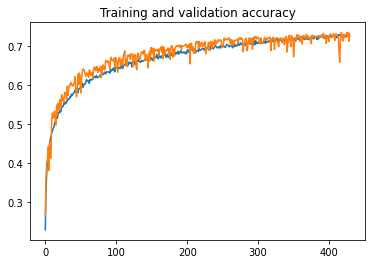

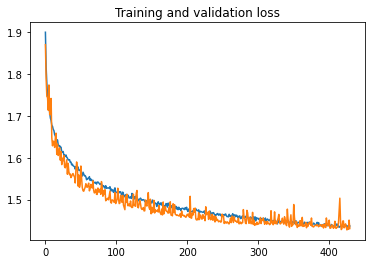

In [30]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()


plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [31]:
Expressions = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
a= []
print ("X_test shape: " + str(X_test.shape))
# X_test = pd.Series(X_test.flatten())

a = preprocessing(X_test)
X_testing_array = np.array(a)



print ("number of Test examples = " + str(X_testing_array.shape[0]))
print ("X_test shape: " + str(X_testing_array.shape))
print ("Y_test shape: " + str(Y_test.shape))

prediction = model.predict(X_testing_array)
model.evaluate(X_testing_array,Y_test)


X_test shape: (10101,)
number of Test examples = 10101
X_test shape: (10101, 48, 48, 1)
Y_test shape: (10101, 1)
316/316 [==============================] - 1s 3ms/step - loss: 1.4240 - accuracy: 0.7386


[1.424025297164917, 0.7386397123336792]

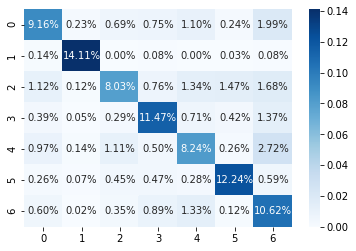

In [36]:
prediction_label = np.argmax(prediction, axis=1)

cf_matrix = confusion_matrix(Y_test, prediction_label)

import seaborn as sn
sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',)

Result: Sad True: Sad
Result: Fear True: Fear
Result: Neutral True: Neutral
Result: Disgust True: Disgust
Result: Happy True: Happy
Result: Happy True: Fear
Result: Happy True: Happy
Result: Disgust True: Disgust
Result: Happy True: Happy


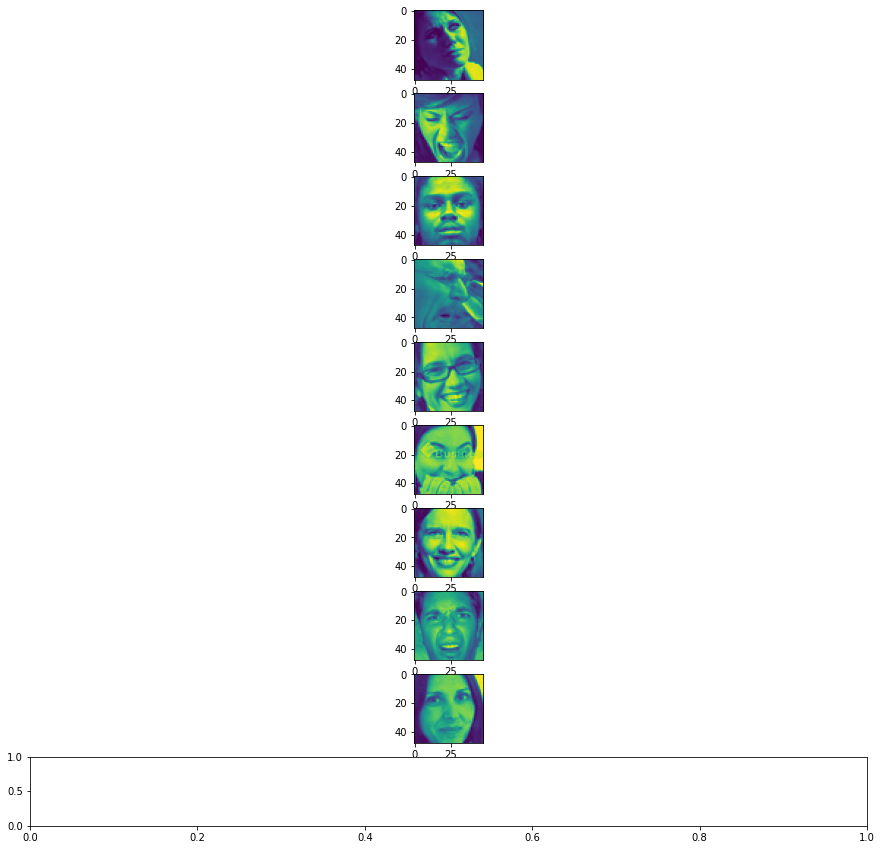

In [33]:
fig, axs = plt.subplots(10, figsize=(15,15))
j = 0;
for i in range(11, 20):
    results = Expressions[np.argmax(prediction[i])]
    true = Expressions[Y_test[i][0]]
    print("Result: {} True: {}".format(results,true))
    image_string = X_test[i].split(' ') 
    image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
    axs[j].imshow(image_data)
    j = j + 1